<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/Derin_%C3%B6%C4%9Frenme_ile_Anomali_tespiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report


In [12]:
file_path = '/content/comprovantes_pix_10000_anomalias.csv'
try:
    df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
except Exception as e:
    print(f"Error loading file: {e}")

print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (10000, 15)


,EndToEndId,DataHora,Valor,Moeda,Pagador_Nome,Pagador_CPF_CNPJ,Pagador_Banco,Recebedor_Nome,Recebedor_CPF_CNPJ,Recebedor_Banco,ChavePix_Utilizada,TipoChave,Descricao,Status,Anomalia
0,f094cb2c-2a73-463c-b60e-0c57262051e4,2025-06-26 21:07:56,4658.86,BRL,Nathan Cardoso,13.253.967/0001-95,BTG Pactual,Ana Beatriz Ramos,901.361.580-95,Nubank,+559694830-9884,Telefone,Pagamento referente ao serviço 927,Concluída,0
1,f0409769-741f-49bd-811a-3842cc8f54db,2025-06-23 17:47:56,3184.72,BRL,Benjamin Barros,781.515.544-64,Banco do Brasil,Carlos Eduardo Nunes,288.758.607-72,Itaú Unibanco,+552298530-1917,Telefone,Pagamento referente ao serviço 950,Pendente,0
2,c1d22287-d343-4c91-b03d-dbe9a69695b3,2025-06-27 15:58:56,1054.48,BRL,Lorena Cunha,444.922.709-96,Banco Inter,Lívia Silveira,530.827.935-48,Bradesco,c4f4c3c6-4d78-4946-b33e-4a1135711a8a,Chave Aleatória,Pagamento referente ao serviço 173,Pendente,0
3,254423a9-50b7-41b1-a099-e8cf6232bab4,2025-07-15 13:59:56,3564.76,BRL,Sra. Luana Pinto,468.153.904-62,Banco Safra,Helena Pires,827.707.674-51,Caixa Econômica Federal,user421@email.com,E-mail,Pagamento referente ao serviço 560,Estornada,0
4,f1c5e3e7-bc62-4f18-91e3-c8f92aebdd59,2025-06-23 06:19:56,15.16,BRL,João Miguel da Cunha,83.407.726/0001-68,Santander Brasil,Dr. Luiz Felipe Dias,65.245.322/0001-12,C6 Bank,user97@email.com,E-mail,Pagamento referente ao serviço 140,Pendente,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EndToEndId          10000 non-null  object 
 1   DataHora            10000 non-null  object 
 2   Valor               10000 non-null  float64
 3   Moeda               10000 non-null  object 
 4   Pagador_Nome        10000 non-null  object 
 5   Pagador_CPF_CNPJ    10000 non-null  object 
 6   Pagador_Banco       10000 non-null  object 
 7   Recebedor_Nome      10000 non-null  object 
 8   Recebedor_CPF_CNPJ  10000 non-null  object 
 9   Recebedor_Banco     10000 non-null  object 
 10  ChavePix_Utilizada  10000 non-null  object 
 11  TipoChave           10000 non-null  object 
 12  Descricao           10000 non-null  object 
 13  Status              10000 non-null  object 
 14  Anomalia            10000 non-null  int64  
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+

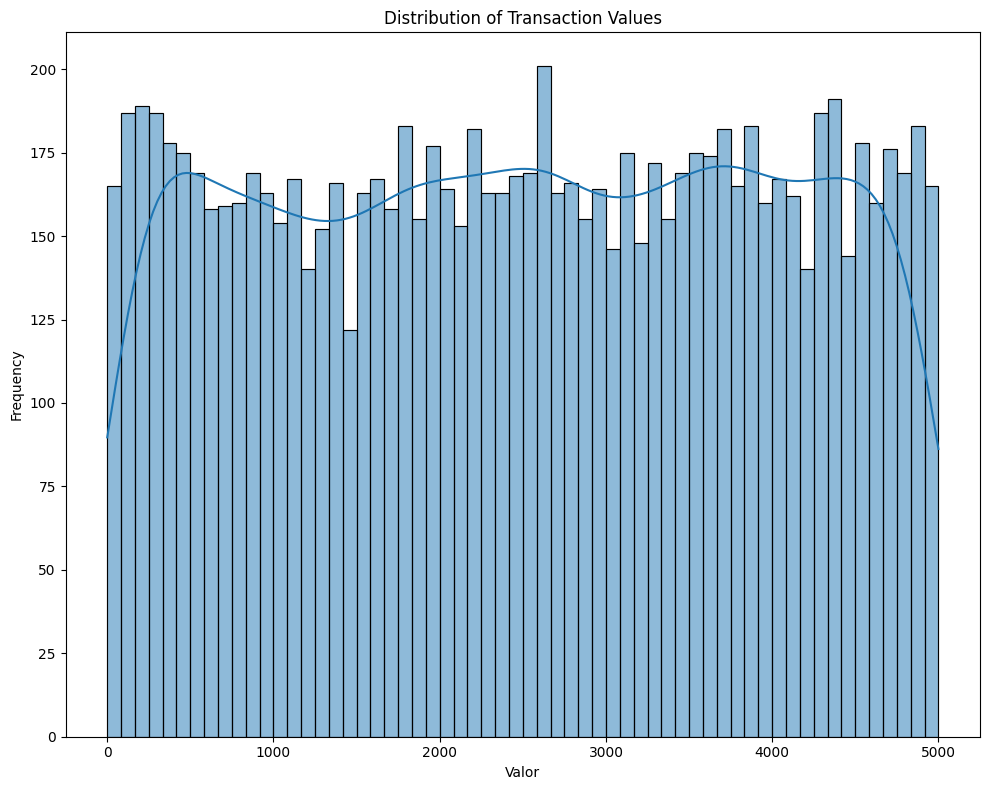

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.histplot(df['Valor'], bins=60, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Valor')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




/tmp/ipython-input-4073529326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=df['Pagador_Banco'].value_counts().index,


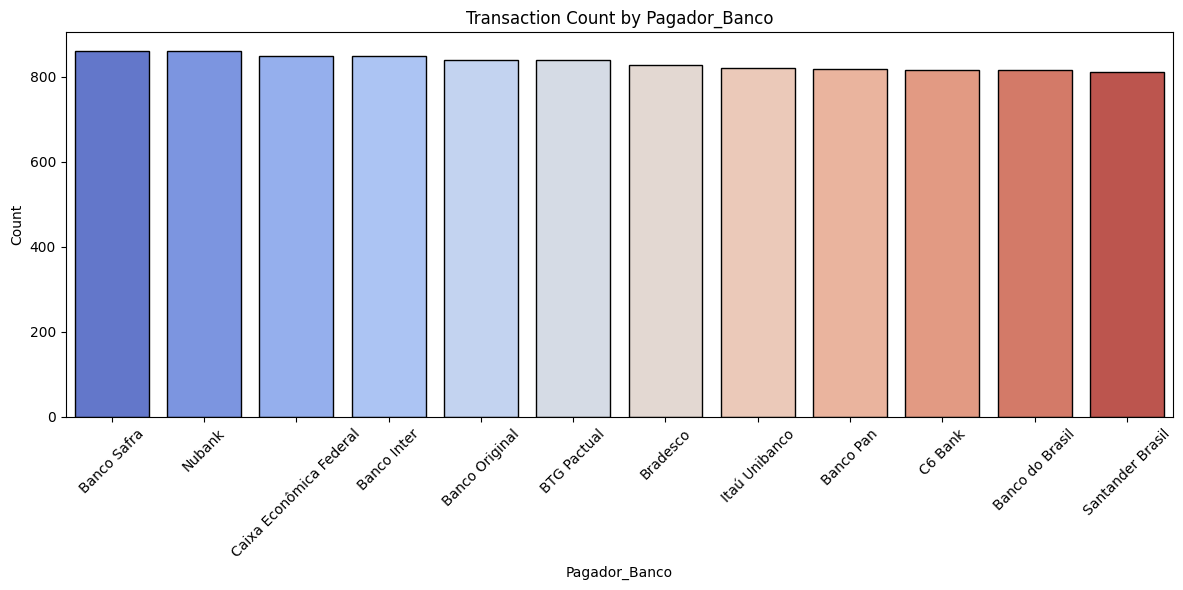

In [17]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=df['Pagador_Banco'].value_counts().index,
                      y=df['Pagador_Banco'].value_counts().values,
                      palette='coolwarm')
plt.title('Transaction Count by Pagador_Banco')
plt.xlabel('Pagador_Banco')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

plt.tight_layout()
plt.show()


In [57]:
X = df[['Valor','Recebedor_Banco']]
y = df['Anomalia']
le=LabelEncoder()
X['Recebedor_Banco']=le.fit_transform(X['Recebedor_Banco'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipython-input-2562934316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Recebedor_Banco']=le.fit_transform(X['Recebedor_Banco'])


In [64]:
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=16, max_value=64, step=16),
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='keras_optimizasyon')

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 00m 09s]
val_accuracy: 0.9894999861717224

Best val_accuracy So Far: 0.9894999861717224
Total elapsed time: 00h 00m 42s


In [65]:
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6258 - loss: 68.8661 - val_accuracy: 0.9840 - val_loss: 1.0267
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9857 - loss: 0.3977 - val_accuracy: 0.9850 - val_loss: 0.2050
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9884 - loss: 0.1173 - val_accuracy: 0.9895 - val_loss: 0.1047
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9910 - loss: 0.0850 - val_accuracy: 0.9895 - val_loss: 0.1076
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0572 - val_accuracy: 0.9895 - val_loss: 0.1009
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0596 - val_accuracy: 0.9895 - val_loss: 0.0786
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0615 - val_accuracy: 0.9895 - val_loss: 0.1258
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9933 - loss: 0.0742 - val_accuracy: 0.9895 - val

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9917 - loss: 0.0891 - val_accuracy: 0.9895 - val_loss: 0.0754
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9927 - loss: 0.0950 - val_accuracy: 0.9895 - val_loss: 0.1249
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9935 - loss: 0.0850 - val_accuracy: 0.9895 - val_loss: 0.0881
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9930 - loss: 0.0653 - val_accuracy: 0.9895 - val_loss: 0.4954
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.3344 - val_accuracy: 0.9895 - val_loss: 0.0740
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9929 - loss: 0.0717 - val_accuracy: 0.9895 - val_loss: 0.6986
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9939 - loss: 0.1814 - val_accuracy: 0.9895 - val_loss: 0.1557
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.1149 - val_accuracy: 0.

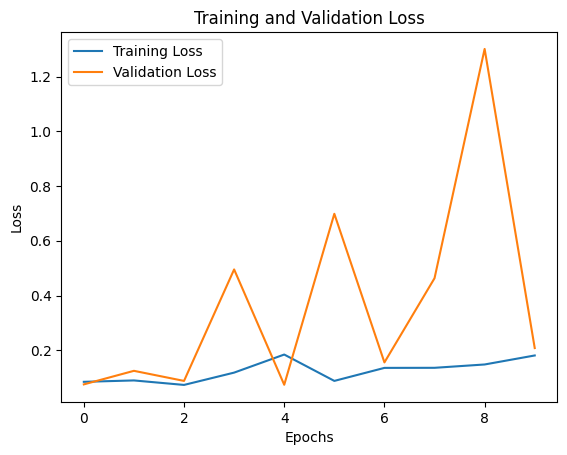

In [66]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
accuracy_score(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


0.9895

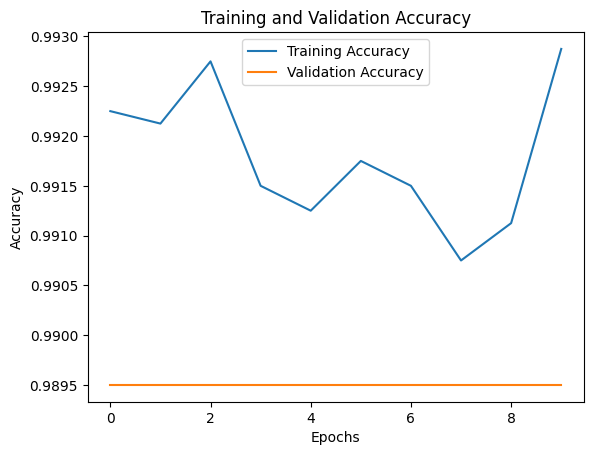

In [69]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()